In [11]:
pip install swifter

In [12]:
pip install spotipy

In [3]:
import pandas as pd
import swifter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob
from tqdm import tqdm


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import statsmodels
import sklearn


pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)

%matplotlib inline

# 1. Loading & Extracting the Data <a name="1"></a>

In [3]:
DATASETS_PATH = 'D:\Data for second project\second project\Spotify_Playlist_Datasets'

In [4]:

FIELDS = ['pid', 'name', 'description', 'modified_at', 'num_artists',
         'num_albums', 'num_tracks', 'num_followers', 'num_edits',
         'duration_ms', 'collaborative']

# Concatenate all json files into a single dataframe and flaten the json object tracks in the original dataset.
for i, dataset in enumerate(glob.glob(DATASETS_PATH+'/*.json')):

    data = json.load(open(dataset))
    
    df_ = pd.json_normalize(data['playlists'], 'tracks', FIELDS, record_prefix= 'track_', errors='ignore')
        
    if i == 0:
        df = df_.copy()
    else:
        df = pd.concat([df, df_], axis=0, ignore_index=True)

In [5]:
df 

,track_pos,track_artist_name,track_track_uri,track_artist_uri,track_track_name,track_album_uri,track_duration_ms,track_album_name,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,duration_ms,collaborative
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266381,92,Alanis Morissette,spotify:track:7c1iI6dwdCpHGYT8DGEfab,spotify:artist:6ogn9necmbUdCppmNnGOdi,Uninvited,spotify:album:4N7LuZYpstQrtcHIoOKzqg,276200,The Collection,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false
266382,93,Alanis Morissette,spotify:track:4l7YIni9bAiGwWMqK5wvgV,spotify:artist:6ogn9necmbUdCppmNnGOdi,You Learn - 2015 Remastered,spotify:album:5Ap3F8CxjjsQKZGASDcHNA,239640,Jagged Little Pill (Remastered),3999,other,NaN,1420848000,17,56,97,1,9,22548683,false
266383,94,Alanis Morissette,spotify:track:2LVxvGhl2U5p2ql2ujc6vZ,spotify:artist:6ogn9necmbUdCppmNnGOdi,Hands Clean,spotify:album:0kKfmdca8GY7bDWFWtY801,269400,Under Rug Swept,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false
266384,95,Andrew McMahon in the Wilderness,spotify:track:2Kgjd9G808FhUDRhS2gidG,spotify:artist:716ZwtZBmwROBXcFmCzfdM,Cecilia And The Satellite,spotify:album:1FtH1WWaGL1OvhTMAMw5XI,223879,Andrew McMahon In The Wilderness,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false


In [7]:
TRACKS_FIELDS = ['track_pos', 'track_artist_name', 'track_track_uri',
                'track_artist_uri', 'track_track_name', 'track_album_uri',
                'track_duration_ms', 'track_album_name']

df = df.reindex(columns = FIELDS+TRACKS_FIELDS)

df.rename(columns={'duration_ms': 'playlist_duration_ms'}, inplace=True)

for column in df.columns:
    if column in TRACKS_FIELDS:
        df.rename(columns={column : column.split('_', maxsplit=1)[1]}, inplace=True)

df.to_csv(os.path.join(DATASETS_PATH, 'initial_dataset.csv'), index=False)
df

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,false,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266381,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false,92,Alanis Morissette,spotify:track:7c1iI6dwdCpHGYT8DGEfab,spotify:artist:6ogn9necmbUdCppmNnGOdi,Uninvited,spotify:album:4N7LuZYpstQrtcHIoOKzqg,276200,The Collection
266382,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false,93,Alanis Morissette,spotify:track:4l7YIni9bAiGwWMqK5wvgV,spotify:artist:6ogn9necmbUdCppmNnGOdi,You Learn - 2015 Remastered,spotify:album:5Ap3F8CxjjsQKZGASDcHNA,239640,Jagged Little Pill (Remastered)
266383,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false,94,Alanis Morissette,spotify:track:2LVxvGhl2U5p2ql2ujc6vZ,spotify:artist:6ogn9necmbUdCppmNnGOdi,Hands Clean,spotify:album:0kKfmdca8GY7bDWFWtY801,269400,Under Rug Swept
266384,3999,other,NaN,1420848000,17,56,97,1,9,22548683,false,95,Andrew McMahon in the Wilderness,spotify:track:2Kgjd9G808FhUDRhS2gidG,spotify:artist:716ZwtZBmwROBXcFmCzfdM,Cecilia And The Satellite,spotify:album:1FtH1WWaGL1OvhTMAMw5XI,223879,Andrew McMahon In The Wilderness


In [8]:
df = pd.read_csv('D:\Data for second project\second project\Spotify_Playlist_Datasets\initial_dataset.csv')
df.columns

Index(['pid', 'name', 'description', 'modified_at', 'num_artists',
       'num_albums', 'num_tracks', 'num_followers', 'num_edits',
       'playlist_duration_ms', 'collaborative', 'pos', 'artist_name',
       'track_uri', 'artist_uri', 'track_name', 'album_uri', 'duration_ms',
       'album_name'],
      dtype='object')

In [19]:
pip install api_info

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement api_info (from versions: none)
ERROR: No matching distribution found for api_info


In [17]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

In [19]:
#credentials = json.load(open('credentials.json'))
#client_id = credentials['client_id']
#client_secret = credentials['client_secret']
client_id = '01d39f65c85e4e9199a71ea021d4b52f'
client_secret = '734db6890ebc43b285f5f623f49d74d6'

In [20]:
#from api_info import client_id, client_secret
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [21]:
df.track_uri.head()

0    0UaMYEvWZi0ZqiDOoHU3YI
1    6I9VzXrHxO9rA9A5euc8Ak
2    0WqIKmW4BTrj3eJFmnCKMv
3    1AWQoqb9bSvzTjaLralEkT
4    1lzr43nnXAijIGYnCT8M8H
Name: track_uri, dtype: object

In [22]:
df["track_uri"] = df["track_uri"].apply(lambda x: str(x).split(":")[-1])
df["track_uri"].head()

0    0UaMYEvWZi0ZqiDOoHU3YI
1    6I9VzXrHxO9rA9A5euc8Ak
2    0WqIKmW4BTrj3eJFmnCKMv
3    1AWQoqb9bSvzTjaLralEkT
4    1lzr43nnXAijIGYnCT8M8H
Name: track_uri, dtype: object

In [23]:
all_uri = df.track_uri.unique().tolist()
df.track_uri.nunique()

93139

In [24]:
p1, p2, p3, p4, p5 = all_uri[:20000], all_uri[2000:40000], all_uri[40000:60000], all_uri[60000:80000], all_uri[80000:]
api_features = []

for uri in tqdm(p1):
    try:
        api_features.append(sp.audio_features(uri)[0])
    except:
        pass

100%|██████████████████████████████████████| 20000/20000 [1:05:18<00:00,  5.10it/s]


In [25]:
for uri in tqdm(p2):
    try:
        api_features.append(sp.audio_features(uri)[0])
    except:
        pass

100%|██████████████████████████████████████| 38000/38000 [1:11:30<00:00,  8.86it/s]


In [26]:
for uri in tqdm(p3):
    try:
        api_features.append(sp.audio_features(uri)[0])
    except:
        pass

100%|████████████████████████████████████████| 20000/20000 [32:28<00:00, 10.27it/s]


In [27]:
for uri in tqdm(p4):
    try:
        api_features.append(sp.audio_features(uri)[0])
    except:
        pass

100%|██████████████████████████████████████| 20000/20000 [1:07:16<00:00,  4.95it/s]


In [28]:
for uri in tqdm(p5):
    try:
        api_features.append(sp.audio_features(uri)[0])
    except:
        pass

100%|████████████████████████████████████████| 13139/13139 [26:14<00:00,  8.35it/s]


In [3]:
df_api = pd.DataFrame(api_features)
df_api.drop_duplicates(inplace=True, ignore_index=True)

# Duration column is duplicated with the initial dataset, so we drop it.
df_api.drop(columns={"duration_ms"}, inplace=True)

df_api.to_csv(os.path.join(DATASETS_PATH, 'api_dataset.csv'), index=False)
df_api

NameError: name 'api_features' is not defined

In [4]:
df_api = pd.read_csv(r'D:\Data for second project\second project\Spotify_Playlist_Datasets\api_dataset.csv')
df_api

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4
1,0.77,0.84,5,-3.91,0,0.11,2.49e-02,2.50e-02,0.24,0.92,143.04,audio_features,6I9VzXrHxO9rA9A5euc8Ak,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,https://api.spotify.com/v1/audio-analysis/6I9V...,4
2,0.66,0.76,2,-6.58,0,0.21,2.38e-03,0.00e+00,0.06,0.70,99.26,audio_features,0WqIKmW4BTrj3eJFmnCKMv,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,https://api.spotify.com/v1/audio-analysis/0WqI...,4
3,0.89,0.71,4,-6.05,0,0.14,2.01e-01,2.34e-04,0.05,0.82,100.97,audio_features,1AWQoqb9bSvzTjaLralEkT,spotify:track:1AWQoqb9bSvzTjaLralEkT,https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,https://api.spotify.com/v1/audio-analysis/1AWQ...,4
4,0.85,0.61,0,-4.60,1,0.07,5.61e-02,0.00e+00,0.31,0.65,94.76,audio_features,1lzr43nnXAijIGYnCT8M8H,spotify:track:1lzr43nnXAijIGYnCT8M8H,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,https://api.spotify.com/v1/audio-analysis/1lzr...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93133,0.65,0.63,7,-7.16,1,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,audio_features,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4
93134,0.46,0.74,9,-6.10,1,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,audio_features,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-analysis/6DW7...,4
93135,0.71,0.68,11,-8.75,1,0.05,5.24e-02,8.97e-02,0.06,0.78,92.40,audio_features,2JtJruenT9hgZE4cnMtBnt,spotify:track:2JtJruenT9hgZE4cnMtBnt,https://api.spotify.com/v1/tracks/2JtJruenT9hg...,https://api.spotify.com/v1/audio-analysis/2JtJ...,4
93136,0.72,0.69,9,-7.42,1,0.04,1.51e-01,3.69e-01,0.08,0.60,94.02,audio_features,5qgBvugGSAnKWCpWAiwusi,spotify:track:5qgBvugGSAnKWCpWAiwusi,https://api.spotify.com/v1/tracks/5qgBvugGSAnK...,https://api.spotify.com/v1/audio-analysis/5qgB...,4


In [10]:
df = pd.merge(df, df_api, left_on='track_uri', right_on='uri', )
df.columns

Index(['pid', 'name', 'description', 'modified_at', 'num_artists',
       'num_albums', 'num_tracks', 'num_followers', 'num_edits',
       'playlist_duration_ms', 'collaborative', 'pos', 'artist_name',
       'track_uri', 'artist_uri', 'track_name', 'album_uri', 'duration_ms',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'time_signature'],
      dtype='object')

In [11]:
df_meta = pd.read_csv(r'D:\Data for second project\second project\Spotify_Playlist_Datasets\meta_data.csv')
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2271 non-null   int64  
 1   album_name          2270 non-null   object 
 2   album_release_date  2270 non-null   object 
 3   track_artist_ids    2270 non-null   object 
 4   track_id            2270 non-null   object 
 5   track_duration_ms   2270 non-null   float64
 6   track_explicit      2270 non-null   object 
 7   track_name          2270 non-null   object 
 8   track_popularity    2270 non-null   float64
 9   danceability        2270 non-null   float64
 10  energy              2270 non-null   float64
 11  key                 2270 non-null   float64
 12  loudness            2270 non-null   float64
 13  mode                2270 non-null   float64
 14  speechiness         2270 non-null   float64
 15  acousticness        2270 non-null   float64
 16  instru

In [12]:
df_meta = df_meta[[ 'album_release_date', 'track_id', 'track_explicit',
              'track_popularity', 'artist_popularity', 'artist_genre1', 'artist_genre2',
              'artist_genre3']]

In [13]:
df.rename(columns={'id': 'track_id'}, inplace=True)

df = df.merge(df_meta, how='inner', right_on='track_id', left_on='track_id')
df.to_csv('D:\Data for second project\second project\Spotify_Playlist_Datasets\merged_dataset.csv', index=False)

In [5]:
# Final merged dataset
df = pd.read_csv('D:\Data for second project\second project\Spotify_Playlist_Datasets\merged_dataset.csv')
df


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,track_id,uri,track_href,analysis_url,time_signature,album_release_date,track_explicit,track_popularity,artist_popularity,artist_genre1,artist_genre2,artist_genre3
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,False,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,66.0,70.0,dance pop,hip hop,hip pop
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,False,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,66.0,70.0,dance pop,hip hop,hip pop
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,False,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,66.0,70.0,dance pop,hip hop,hip pop
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,False,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,66.0,70.0,dance pop,hip hop,hip pop
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,False,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,66.0,70.0,dance pop,hip hop,hip pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44007,3963,Bumpin,NaN,1503964800,60,95,162,1,67,38855043,False,52,J. Cole,spotify:track:7qZnrRGtCSDz4apCr4IGtD,spotify:artist:6l3HvQ5sa6mXTsMTB19rO5,God's Gift,spotify:album:4skqOUXyBUnzxVPNPxrGWV,212800,Cole World: The Sideline Story,0.33,0.79,1,-4.49,0,0.22,3.11e-02,2.64e-04,0.10,0.44,79.65,audio_features,7qZnrRGtCSDz4apCr4IGtD,spotify:track:7qZnrRGtCSDz4apCr4IGtD,https://api.spotify.com/v1/tracks/7qZnrRGtCSDz...,https://api.spotify.com/v1/audio-analysis/7qZn...,4,2011-09-23,True,0.0,85.0,conscious hip hop,hip hop,north carolina hip hop
44008,3969,Roadtrip,NaN,1500249600,107,137,166,1,8,36538249,True,143,Eric Hutchinson,spotify

# 4rth Task

<AxesSubplot:xlabel='modified_at'>

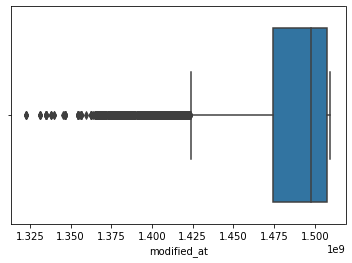

In [6]:
sns.boxplot(x=df["modified_at"])
#note that modified at is left skewed not right skewed as mentioned in colab notebook

<AxesSubplot:xlabel='energy'>

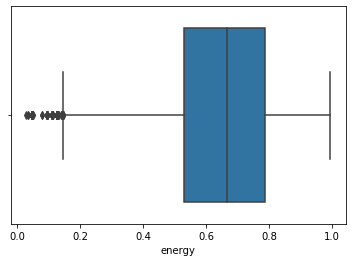

In [7]:
sns.boxplot(x=df["energy"])
#note that energy is left skewed not right skewed as mentioned in colab notebook

<AxesSubplot:xlabel='loudness'>

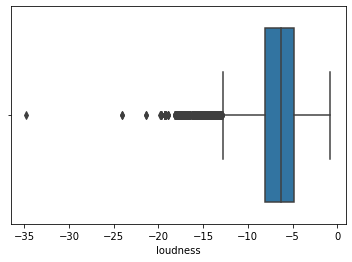

In [8]:
sns.boxplot(x=df["loudness"])
#note that loudness is left skewed not right skewed as mentioned in colab notebook

<AxesSubplot:xlabel='time_signature'>

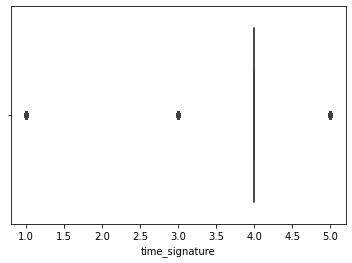

In [9]:
sns.boxplot(x=df["time_signature"])
#note that time_signature is left skewed not right skewed as mentioned in colab notebook

<AxesSubplot:xlabel='num_artists'>

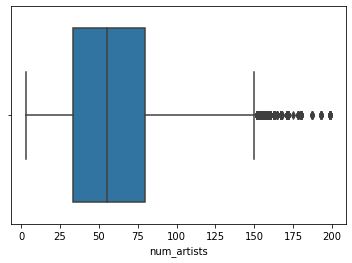

In [10]:
sns.boxplot(x=df["num_artists"])
#note that num_artists is right skewed not left skewed as mentioned in colab notebook

<AxesSubplot:xlabel='num_artists'>

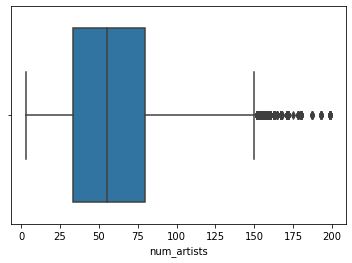

In [11]:
sns.boxplot(x=df["num_artists"])
#note that num_artists is right skewed not left skewed as mentioned in colab notebook

In [28]:
modified_at_log=np.log(df['modified_at'])
energy_log=np.log(df['energy'])
loudness_log=np.log(df['loudness'])
time_signature_log=np.exp(df['time_signature'])
num_artists_exp=np.exp(df['num_artists'])
num_albums=np.exp(df['num_albums'])
num_tracks=np.exp(df['num_tracks'])
num_followers=np.exp(df['num_followers'])
num_edits=np.exp(df['num_edits'])
playlist_duration_ms=np.exp(df['playlist_duration_ms'])
duration_ms=np.log(df['duration_ms'])
key=np.exp(df['key'])
speechiness=np.log(df['speechiness'])
acousticness=np.exp(df['acousticness'])
instrumentalness=np.exp(df['instrumentalness'])


#new dataframe to store append result



D:\New folder (2)\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\New folder (2)\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
myDataFrame = pd.DataFrame()
myDataFrame=pd.concat([ energy_log, loudness_log, time_signature_log, num_artists_exp,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,duration_ms,key,speechiness,acousticness,instrumentalness]
,axis=1)

In [30]:
myDataFrame

,energy,loudness,time_signature,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,duration_ms,key,speechiness,acousticness,instrumentalness
0,-0.21,NaN,54.6,1.17e+16,2.58e+20,3.83e+22,2.72,4.03e+02,inf,12.33,54.60,-2.11,1.03,1.01
1,-0.21,NaN,54.6,1.84e+74,5.20e+97,2.52e+106,2.72,1.96e+11,inf,12.33,54.60,-2.11,1.03,1.01
2,-0.21,NaN,54.6,1.37e+32,2.45e+40,3.64e+42,2.72,5.46e+01,inf,12.33,54.60,-2.11,1.03,1.01
3,-0.21,NaN,54.6,1.61e+48,1.43e+55,3.37e+72,2.72,3.27e+06,inf,12.33,54.60,-2.11,1.03,1.01
4,-0.21,NaN,54.6,4.42e+05,1.20e+06,1.20e+06,7.39,1.48e+02,inf,12.33,54.60,-2.11,1.03,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44007,-0.23,NaN,54.6,1.14e+26,1.81e+41,2.27e+70,2.72,1.25e+29,inf,12.27,2.72,-1.51,1.03,1.00
44008,-0.50,NaN,54.6,2.95e+46,3.15e+59,1.24e+72,2.72,2.98e+03,inf,12.31,148.41,-3.00,1.51,1.00
44009,-0.35,NaN,54.6,8.66e+16,2.58e+20,1.55e+25,7.39,1.74e+18,inf,12.37,403.43,-3.44,1.01,1.00
44010,-0.05,NaN,54.6,2.01e+01,4.03e+02,3.19e+16,2.72,1.48e+02,inf,12.34,1.00,-2.43,1.00,1.04


D:\New folder (2)\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


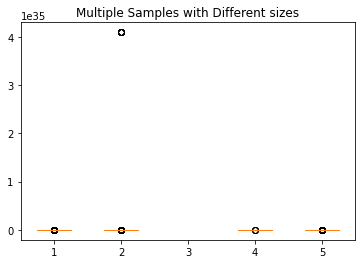

In [31]:
data = [myDataFrame['energy'], myDataFrame['num_followers'],myDataFrame['playlist_duration_ms'],myDataFrame['speechiness'],myDataFrame['acousticness']]
fig1,ax1 = plt.subplots()
ax1.set_title('Multiple Samples with Different sizes');
ax1.boxplot(data);

In [32]:
myDataFrame.describe()

D:\New folder (2)\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,energy,loudness,time_signature,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,duration_ms,key,speechiness,acousticness,instrumentalness
count,4.40e+04,0.0,44012.00,4.40e+04,4.40e+04,4.40e+04,4.40e+04,4.40e+04,44012.0,44012.00,44012.00,44012.00,44012.00,44012.00
mean,-4.80e-01,NaN,54.40,1.39e+83,8.19e+97,1.07e+105,inf,2.21e+74,inf,12.33,7671.90,-2.62,1.24,1.02
std,3.36e-01,NaN,12.06,6.08e+84,3.55e+99,1.54e+106,NaN,6.65e+75,NaN,0.20,17326.25,0.80,0.33,0.12
min,-3.56e+00,NaN,2.72,2.01e+01,2.01e+01,1.48e+02,2.72e+00,7.39e+00,inf,10.86,1.00,-3.79,1.00,1.00
25%,-6.33e-01,NaN,54.60,2.15e+14,4.73e+18,2.83e+23,2.72e+00,2.98e+03,NaN,12.21,2.72,-3.28,1.02,1.00
50%,-4.06e-01,NaN,54.60,7.69e+23,1.37e+32,1.81e+41,2.72e+00,1.78e+08,NaN,12.32,148.41,-2.87,1.09,1.00
75%,-2.38e-01,NaN,54.60,5.54e+34,4.38e+48,1.89e+64,7.39e+00,8.66e+16,NaN,12.45,2980.96,-2.06,1.30,1.00
max,-6.02e-03,NaN,148.41,2.66e+86,1.55e+101,5.07e+107,inf,2.02e+77,inf,13.29,59874.14,-0.17,2.71,2.61


In [48]:
Inner_fence=[]
Outer_fence=[]
Q3 = np.quantile(df['loudness'], 0.75)
Q1 = np.quantile(df['loudness'], 0.25)
IQR = Q3 - Q1
Inner_fence.append([Q1-1.5*IQR, Q3+1.5*IQR])

Outer_fence.append([Q1-3*IQR, Q3+3*IQR])

In [49]:
Inner_fence

[[-12.7865, -0.12649999999999917]]

In [50]:
Outer_fence

[[-17.534, 4.621000000000001]]

In [51]:
Q3 = np.quantile(df['time_signature'], 0.75)
Q1 = np.quantile(df['time_signature'], 0.25)
IQR = Q3 - Q1
Inner_fence.append([Q1-1.5*IQR, Q3+1.5*IQR])

Outer_fence.append([Q1-3*IQR, Q3+3*IQR])

In [55]:
Q3 = np.quantile(df['num_edits'], 0.75)
Q1 = np.quantile(df['num_edits'], 0.25)
IQR = Q3 - Q1
Inner_fence.append([Q1-1.5*IQR, Q3+1.5*IQR])

Outer_fence.append([Q1-3*IQR, Q3+3*IQR])

# Feature Scaling

In [61]:
x = df.iloc[:,9:10].values

In [62]:
from sklearn import preprocessing
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
x_after_min_max_scaler = min_max_scaler.fit_transform(x)

In [65]:
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df



In [72]:

scaled_df = scaleColumns(df,['modified_at' , 'playlist_duration_ms','num_artists','num_albums','num_tracks','num_edits','instrumentalness','acousticness','duration_ms','loudness','track_popularity','artist_popularity'])
scaled_df

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,track_id,uri,track_href,analysis_url,time_signature,album_release_date,track_explicit,track_popularity,artist_popularity,artist_genre1,artist_genre2,artist_genre3
0,0,Throwbacks,NaN,0.91,0.17,0.19,0.19,1,0.02,0.16,False,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.32,The Cookbook,0.90,0.81,4,0.81,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,0.76,0.74,dance pop,hip hop,hip pop
1,123,w o r k o u t,NaN,0.95,0.86,0.97,0.99,1,0.14,0.82,False,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.32,The Cookbook,0.90,0.81,4,0.81,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,0.76,0.74,dance pop,hip hop,hip pop
2,218,party playlist,NaN,0.97,0.36,0.39,0.38,1,0.01,0.30,False,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.32,The Cookbook,0.90,0.81,4,0.81,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,0.76,0.74,dance pop,hip hop,hip pop
3,342,Dance mix,NaN,0.81,0.55,0.54,0.67,1,0.07,0.63,False,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.32,The Cookbook,0.90,0.81,4,0.81,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,0.76,0.74,dance pop,hip hop,hip pop
4,382,spin,NaN,0.98,0.05,0.05,0.04,2,0.02,0.04,False,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.32,The Cookbook,0.90,0.81,4,0.81,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,0.76,0.74,dance pop,hip hop,hip pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44007,3963,Bumpin,NaN,0.97,0.29,0.40,0.65,1,0.37,0.57,False,52,J. Cole,spotify:track:7qZnrRGtCSDz4apCr4IGtD,spotify:artist:6l3HvQ5sa6mXTsMTB19rO5,God's Gift,spotify:album:4skqOUXyBUnzxVPNPxrGWV,0.30,Cole World: The Sideline Story,0.33,0.79,1,0.89,0,0.22,3.12e-02,2.75e-04,0.10,0.44,79.65,audio_features,7qZnrRGtCSDz4apCr4IGtD,spotify:track:7qZnrRGtCSDz4apCr4IGtD,https://api.spotify.com/v1/tracks/7qZnrRGtCSDz...,https://api.spotify.com/v1/audio-analysis/7qZn...,4,2011-09-23,True,0.00,0.89,conscious hip hop,hip hop,north carolina hip hop
44008,3969,Roadtrip,NaN,0.95,0.53,0.58,0.66,1,0.03,0.53,True,143,Eric Hutchinson,spotify:track:1bqi9YEdZweX9H6JuSQ6Qw,spotif

# Create New Features by Features Interaction

In [73]:
df['song_engergitc']=df['danceability']*df['energy']*df['loudness']

In [75]:
df['song_engergitc']

In [81]:
df['popularity'] =df['track_popularity']*df['artist_popularity']

# Drop Useless Features

In [77]:
df.drop('danceability',axis=1,inplace=True)

In [78]:
df.drop('energy',axis=1,inplace=True)

In [83]:
df.drop('loudness',axis=1,inplace=True)

In [84]:
df.drop('track_popularity',axis=1,inplace=True)

In [85]:
df.drop('artist_popularity',axis=1,inplace=True)

In [86]:
df.drop('track_href',axis=1,inplace=True)

In [ ]:
df.drop('analysis_url',axis=1,inplace=True)

In [ ]:
df.drop('track_id',axis=1,inplace=True)

In [ ]:
df.drop('uri',axis=1,inplace=True)

In [87]:
df.drop('type',axis=1,inplace=True)

In [88]:
df.drop([ 'artist_name','track_uri','artist_uri','track_name','album_uri'],axis=1)

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,album_name,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,uri,analysis_url,time_signature,album_release_date,track_explicit,artist_genre1,artist_genre2,artist_genre3,song_engergitc,popularity
0,0,Throwbacks,NaN,0.91,0.17,0.19,0.19,1,0.02,0.16,False,0,0.32,The Cookbook,4,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,dance pop,hip hop,hip pop,0.60,0.56
1,123,w o r k o u t,NaN,0.95,0.86,0.97,0.99,1,0.14,0.82,False,73,0.32,The Cookbook,4,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,dance pop,hip hop,hip pop,0.60,0.56
2,218,party playlist,NaN,0.97,0.36,0.39,0.38,1,0.01,0.30,False,14,0.32,The Cookbook,4,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,dance pop,hip hop,hip pop,0.60,0.56
3,342,Dance mix,NaN,0.81,0.55,0.54,0.67,1,0.07,0.63,False,42,0.32,The Cookbook,4,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,dance pop,hip hop,hip pop,0.60,0.56
4,382,spin,NaN,0.98,0.05,0.05,0.04,2,0.02,0.04,False,1,0.32,The Cookbook,4,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/audio-analysis/0UaM...,4,2005-07-04,True,dance pop,hip hop,hip pop,0.60,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44007,3963,Bumpin,NaN,0.97,0.29,0.40,0.65,1,0.37,0.57,False,52,0.30,Cole World: The Sideline Story,1,0,0.22,3.12e-02,2.75e-04,0.10,0.44,79.65,7qZnrRGtCSDz4apCr4IGtD,spotify:track:7qZnrRGtCSDz4apCr4IGtD,https://api.spotify.com/v1/audio-analysis/7qZn...,4,2011-09-23,True,conscious hip hop,hip hop,north carolina hip hop,0.23,0.00
44008,3969,Roadtrip,NaN,0.95,0.53,0.58,0.66,1,0.03,0.53,True,143,0.31,Sounds Like This,5,1,0.05,4.12e-01,4.85e-04,0.11,0.63,112.49,1bqi9YEdZweX9H6JuSQ6Qw,spotify:track:1bqi9YEdZweX9H6JuSQ6Qw,https://api.spotify.com/v1/audio-analysis/1bqi...,4,2008,False,acoustic pop,indiecoustica,neo mellow,0.41,0.27
44009,3982,Sheets,NaN,0.99,0.18,0.19,0.22,2,0.23,0.19,False,27,0.34,Live & Grow,6,1,0.03,1.16e-02,1.30e-04,0.24,0.44,129.95,1EmE0i81dj6zuqqDdY4B0o,spotify:track:1EmE0i81dj6zuqqDdY4B0o,https://api.spotify.com/v1/audio-analysis/1EmE...,4,2015-09-25,True,hip hop,underground hip hop,west coast trap,0.48,0.21
44010,3989,Pierce The Veil,NaN,0.70,0.00,0.01,0.14,1,0.02,0.11,False,4,0.33,A Flair For The Dramatic,0,0,0.09,9.23e-04,3.81e-02,0.37,0.31,84.59,5hC3nG6GuJoTUZixqS0Co4,spotify:track:5hC3nG6GuJoTUZixqS0Co4,https://api.spotify.com/v1/audio-analysis/5hC3...,4,2007,False,metalcore,modern rock,pop punk,0.33,0.37


In [89]:
df.drop([ 'name','description','album_name','track_id','analysis_url'],axis=1)

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,time_signature,album_release_date,track_explicit,artist_genre1,artist_genre2,artist_genre3,song_engergitc,popularity
0,0,0.91,0.17,0.19,0.19,1,0.02,0.16,False,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.32,4,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,4,2005-07-04,True,dance pop,hip hop,hip pop,0.60,0.56
1,123,0.95,0.86,0.97,0.99,1,0.14,0.82,False,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.32,4,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,4,2005-07-04,True,dance pop,hip hop,hip pop,0.60,0.56
2,218,0.97,0.36,0.39,0.38,1,0.01,0.30,False,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.32,4,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,4,2005-07-04,True,dance pop,hip hop,hip pop,0.60,0.56
3,342,0.81,0.55,0.54,0.67,1,0.07,0.63,False,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.32,4,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,4,2005-07-04,True,dance pop,hip hop,hip pop,0.60,0.56
4,382,0.98,0.05,0.05,0.04,2,0.02,0.04,False,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.32,4,0,0.12,3.12e-02,7.27e-03,0.05,0.81,125.46,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,4,2005-07-04,True,dance pop,hip hop,hip pop,0.60,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44007,3963,0.97,0.29,0.40,0.65,1,0.37,0.57,False,52,J. Cole,spotify:track:7qZnrRGtCSDz4apCr4IGtD,spotify:artist:6l3HvQ5sa6mXTsMTB19rO5,God's Gift,spotify:album:4skqOUXyBUnzxVPNPxrGWV,0.30,1,0,0.22,3.12e-02,2.75e-04,0.10,0.44,79.65,spotify:track:7qZnrRGtCSDz4apCr4IGtD,4,2011-09-23,True,conscious hip hop,hip hop,north carolina hip hop,0.23,0.00
44008,3969,0.95,0.53,0.58,0.66,1,0.03,0.53,True,143,Eric Hutchinson,spotify:track:1bqi9YEdZweX9H6JuSQ6Qw,spotify:artist:39x8gyJjTHiBQklFgVJSV4,Food Chain,spotify:album:5XEF3r3rrj8lxoEWKSBnke,0.31,5,1,0.05,4.12e-01,4.85e-04,0.11,0.63,112.49,spotify:track:1bqi9YEdZweX9H6JuSQ6Qw,4,2008,False,acoustic pop,indiecoustica,neo mellow,0.41,0.27
44009,3982,0.99,0.18,0.19,0.22,2,0.23,0.19,False,27,Casey Veggies,spotify:track:1EmE0i81dj6zuqqDdY4B0o,spotify:artist:0uFc6StTmJBvdHPZFDkdJy,Wonderful,spotify:album:4YsS6HUCoyntWFTReZD1GU,0.34,6,1,0.03,1.16e-02,1.30e-04,0.24,0.44,129.95,spotify:track:1EmE0i81dj6zuqqDdY4B0o,4,2015-09-25,True,hip hop,underground hip hop,west coast trap,0.48,0.21
44010,3989,0.70,0.00,0.01,0.14,1,0.02,0.11,False,4,Pierce The Veil,spotify:track:5hC3nG6GuJoTUZixqS0Co4,spotify:artist:4iJLPqClelZOBCBifm8Fzv,The Cheap Bouquet,spotify:album:6LkthUHeWKSJsXhjs7SXFq,0.33,0,0,0.09,9.23e-04,3.81e-02,0.37,0.31,84.59,spotify:track:5hC3nG6GuJoTUZixqS0Co4,4,2007,False,metalcore,modern rock,pop punk,0.33,0.37


# Use PCA for Dimensionality Reduction